### EE 421/521 Image Processing - Spring 2021-22

## Project 3 -  Two-Dimensional Filtering

#### Submission deadline: 10 March 2022

In this project, you will implement the following:

1. A 2D convolution
2. High-frequency boost filter
3. Horizontal edge detection filter
4. 135-degree edge detection filter
5. Unsharp-masking filter (long approach)
6. Unsharp-masking filter (direct approach)

**Note: This project will be graded for both EE 421 (HW2) and EE 521 (HW2) students.**

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

************************************
***Metin Arda Köker***
************************************

In [1]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

In [2]:
# function to round image data to nearest integer, truncate to range [0, 255], set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

In [3]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [12]:
# ===============================
# (1.a) Implement 2D convolution
# ===============================

# ADD YOUR CODE HERE

# calculate 2-D convolution

def my_filter2D(X, H):
    
    # X: 2D input image
    # H: 2D filter kernel
    
    # make sure both X and H are 2-D
    assert( X.ndim == 2)
    assert( H.ndim == 2)

    # get the horizontal and vertical size of X and H
    X_size_x = X.shape[1]
    X_size_y = X.shape[0]
    H_size_x = H.shape[1]
    H_size_y = H.shape[0]

    # calculate the horizontal and vertical size of Y (assume "full" convolution)
    Y_size_x = X_size_x + H_size_x - 1
    Y_size_y = X_size_y + H_size_y - 1
        
    # create an empty output array
    Y = np.zeros((Y_size_y,Y_size_x))

    # (i) go over output locations
    for x1 in range(Y_size_x):
        for y1 in range(Y_size_y):
        # (ii) go over kernel locations
            for x2 in range(H_size_x):
                for y2 in range(H_size_y):
            # (iii) make sure the kernel is within bounds
                    if ((y1-y2)<X_size_y and (x1-x2)< X_size_x and  0 <= (x1-x2) and  0 <= (y1-y2)) :
            # (iv) calculate the convolution sum
                        Y[y1][x1]=Y[y1][x1]+H[y2][x2]*X[y1-y2][x1-x2]
    return Y

# end of function


In [13]:
# ===============================
# (1.b) Test your 2-D convolution function
# ===============================

# a sample 2-D input
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# a sample 2-D filter 
H = np.array([[2, 4, -2],
              [1, 2, -1]])

# call your function to calculate 2D convolution
Y_my = my_filter2D(X, H)

# print your output
print("My convolution: \n", Y_my)

# use SciPy function to calculate 2D convolution
Y_sp = signal.convolve2d(X, H, mode='full', boundary='fill', fillvalue=0)

# print SciPy output and compare it with yours
print("\nSciPy convolution: \n", Y_sp)

# print the error evaluated as sum-squared-difference
print("\nError: ", ((Y_my - Y_sp)*(Y_my - Y_sp)).sum())


My convolution: 
 [[ 4. 10.  4. 12.  8. -6.  0.]
 [ 4. 15. 16. 10.  6. -1. -2.]
 [ 5. 19. 15. -2.  9.  7. -5.]
 [ 2.  9. 14. 12.  8.  3. -4.]
 [ 0.  1.  5.  7.  2.  0. -1.]]

SciPy convolution: 
 [[ 4 10  4 12  8 -6  0]
 [ 4 15 16 10  6 -1 -2]
 [ 5 19 15 -2  9  7 -5]
 [ 2  9 14 12  8  3 -4]
 [ 0  1  5  7  2  0 -1]]

Error:  0.0


Image width is 512 and image height is 512.
Number of color bands is 3.
Image data type is uint8.



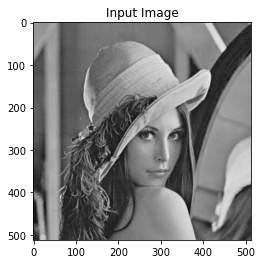

In [6]:
# STEP 2 Pick an image for filtering

# set image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week3'

# read input image 
image_file = r'/lena.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

height = imgRGB.shape[0]
width = imgRGB.shape[1]
bands = imgRGB.shape[2]
datatype = imgRGB.dtype

print("Image width is {} and image height is {}.".format(width, height))
print("Number of color bands is {}.".format(bands))
print("Image data type is {}.\n".format(datatype))

# calculate the luminance image
img_input = my_imgLuminance(imgRGB)

# display luminance image
plt.imshow(img_input, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.show()

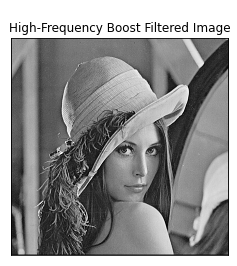

In [15]:
# =====================================================
# (2.1) Define a high-frequency boost filter and apply it on input image
# =====================================================

# ADD YOUR CODE HERE

# (i) define a high-frequency boost filter
high_frequency_bf =   np.array([[0, -1, 0],
                                [-1,  5, -1],
                                [0, -1, 0]])

# (ii) apply the high-frequency boost filter on the input image
# use the signal.convolve2d() function for filtering
img_output_High_Pass = signal.convolve2d(img_input, high_frequency_bf,mode='full', boundary='fill', fillvalue=0)


# (iii) display the output image
plt.imshow(img_output_High_Pass, cmap='gray', vmin=0, vmax=255)
plt.title('\nHigh-Frequency Boost Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

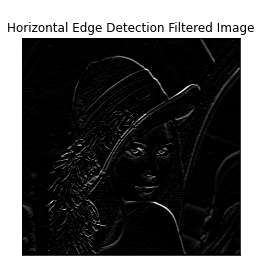

In [8]:
# ========================================================
# (2.2) Define a horizontal edge detection filter and apply it on input image
# ========================================================

# ADD YOUR CODE HERE

# (i) define a horizontal edge detection filter
my_filter2D =   np.array([[1, 1, 1],
                          [0,  0, 0],
                          [-1, -1, -1]])
# (ii) apply the horizontal edge detection filter on the input image
# use the signal.convolve2d() function for filtering
img_output_Horizontal_Edge = signal.convolve2d(img_input, my_filter2D,mode='full', boundary='fill', fillvalue=0)


# (iii) display the output image
plt.imshow(img_output_Horizontal_Edge, cmap='gray', vmin=0, vmax=255)
plt.title('\nHorizontal Edge Detection Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

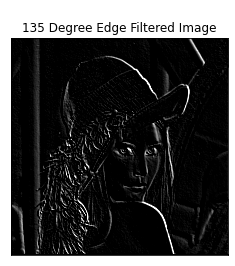

In [9]:
# ========================================================
# (2.3) Apply a 135-degree edge detection filter on input image
# ========================================================

# ADD YOUR CODE HERE

# (i) define a 135-degree edge detection filter
my_filter2D =   np.array([[0, 1, 2],
                          [-1,  0, 1],
                          [-2, -1, 0]])

# (ii) apply the 135-degree edge detection filter on the input image
# use the signal.convolve2d() function for filtering
img_output_Horizontal_Edge = signal.convolve2d(img_input, my_filter2D,mode='full', boundary='fill', fillvalue=0)


# (iii) display the output image
plt.imshow(img_output_Horizontal_Edge, cmap='gray', vmin=0, vmax=255)
plt.title('\n135 Degree Edge Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

M = 1, sigma = 0.425, size = 3



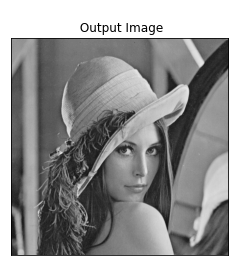

In [25]:
# ==========================================================================
# (3.1) Implement unsharp masking (long approach)
# ==========================================================================

# ADD YOUR CODE HERE

# (i) define a Gaussian filter
# h
M = 1
# standard deviation of Gaussian
sigma = 0.425 * M
# filter size
size = np.round(2.55 * M, 0)
size = size.astype(int)
# for symmetric filter size should be odd
if size%2 == 0:
    size -= 1
# print filter parameters
print("M = {}, sigma = {}, size = {}\n".format(M, sigma, size))
# calculate Gaussian with the selected parameters
gauss_filter = signal.gaussian(size, sigma, sym=True)
# normalize sum to 1
gauss_filter /= gauss_filter.sum()
# obtain the separable 2D filter from the 1D filter
gauss_filter2D = np.outer(gauss_filter, gauss_filter)


# (ii) apply the Gaussian filter to obtain a blurred image
# use the signal.convolve2d() function for filtering
# x * h
# filter the input image with the Gaussian filter
img_output_Gauss = signal.convolve2d(img_input, gauss_filter2D, mode='same', boundary='fill', fillvalue=128)

# round output data to nearest integer
img_output_Gauss = my_imgTruncate(img_output_Gauss)

# (iii) calculate the sharpening image
# x - x * h
img_sharp = img_input - img_output_Gauss

# (iv) calculate the output image using the blurred image and sharpening image
# x + x - x * h 
img_output = img_input + img_sharp
plt.imshow(img_output, cmap='gray', vmin=0, vmax=255)
plt.title('\n Output Image')
plt.xticks([]), plt.yticks([])
plt.show()

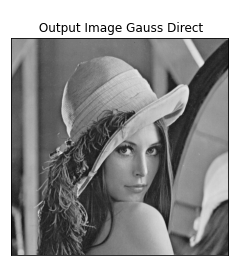

In [29]:
# ==========================================================================
# (3.2) Implement unsharp masking (direct approach)
# ==========================================================================

# ADD YOUR CODE HERE

# (i) define convolution mask
# x + x - x * h = x * I + x * I - x * h = x * (I + I - h) = x * D
#
# 3 x 3 identity filter I = [[0, 0, 0],
#                            [0, 1, 0]]
#                            [0, 0, 0]]
#
# Direct unsharp masking filter: D = 2I - h 
I = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])

D = 2 * I - gauss_filter2D
# (ii) calculate the output image
# use the signal.convolve2d() function for filtering
img_output_Gauss_direct = signal.convolve2d(img_input, D, mode='same', boundary='fill', fillvalue=128)

# (iii) display the output image
plt.imshow(img_output_Gauss_direct, cmap='gray', vmin=0, vmax=255)
plt.title('\n Output Image Gauss Direct')
plt.xticks([]), plt.yticks([])
plt.show()


*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Comment on the filtering results in 2.1, 2.2 and 2.3. Do the results look as expected?
 In 2.1 the output image become sharper and a little bit brighter than the input image. The brightness comes from the total value of kernel's is a positive number.
 In 2.2 the output image shows horizontal lines as white, however it also shows other white lines. There are not horizontal lines which they are created by other horizontal lines.
 In 2.3 the output image shows 135 degreed lines and this image contains much more lines than 2.2 image and also all lines created by 135 degreed lines.


(b) Comment on the filtering results of 3.1 and 3.2. Do they look the same and appear as enhanced?
 In 3.2 The image is brighter and smoother if the variables are higher the attributes are getting higher.

